In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
def obtain_client_info(filename):
    clients = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        headers = next(reader)[0:]
        for row in reader:
            clients.append({key: value for key, value in zip(headers, row[0:])})
    return clients

In [3]:
def separate_yes_no(clients):
    yes_list = []
    no_list = []
    for i in range(1, len(clients)):
        if "Yes" in clients[i]['Offer Accepted']:
            yes_list.append(clients[i])
        else:
            no_list.append(clients[i])
    return yes_list, no_list 

In [41]:
def get_data(clients, info):
    data = {}
    for i in range(1, len(clients)):
        value = clients[i][info]
        if value not in data.keys():
            data[value] = 0
        else:
            data[value] += 1
    return dict(sorted(data.items()))

In [5]:
def pie_plot(y, labels, title):
    fig = plt.figure()
    plt.title(title)
    plt.pie(y, labels = labels, autopct='%1.1f%%')
    plt.show()

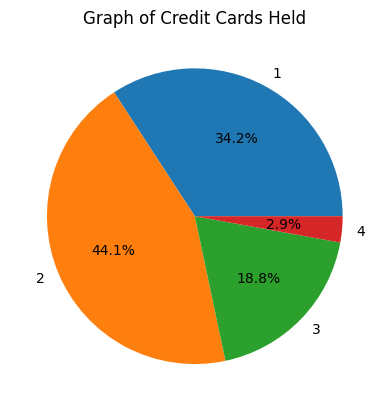

In [40]:
filename = "creditcardmarketing_2.csv"
clients = obtain_client_info(filename)
info = "Credit Cards Held"
(yes_list,no_list)=separate_yes_no(clients)
data = get_data(clients, info)
pie_plot(list(data.values()), list(data.keys()),"Graph of " + info)